The notebook has been created using a lot of techniques and pythong snippets sourced from the packt publishing code

In [158]:
import numpy as np
import pandas as pd
import sklearn

#### Movie Lens Dataset Backgorund
MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
    * Simple demographic info for the users (age, gender, occupation, zip)


### user item information

In [159]:
user_item_df = pd.read_csv('./ml-100k/u.data', sep='\t',names=['UserID', 'ItemId', 'Rating', 'Timestamp'])

In [160]:
user_item_df.head()

,UserID,ItemId,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [161]:
user_item_df.shape

(100000, 4)

#### no of unique users and items

In [162]:
n_users = len(user_item_df['UserID'].unique())
print('no of unique users are: '+str(n_users))

no of unique users are: 943


In [163]:
n_items = len(user_item_df['ItemId'].unique())
print('no of unique items are: '+str(n_items))

no of unique items are: 1682


#### distribution of ratings given by users

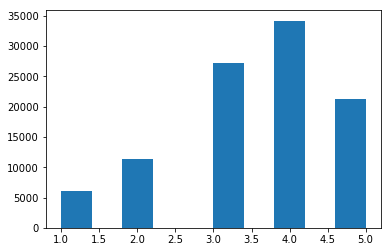

In [165]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.hist(user_item_df['Rating'])
plt.show()

#### check distribution of movie views

(array([  1.14600000e+03,   2.49000000e+02,   1.39000000e+02,
          6.70000000e+01,   3.80000000e+01,   2.40000000e+01,
          7.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   59.2,  117.4,  175.6,  233.8,  292. ,  350.2,  408.4,
         466.6,  524.8,  583. ]),
 <a list of 10 Patch objects>)

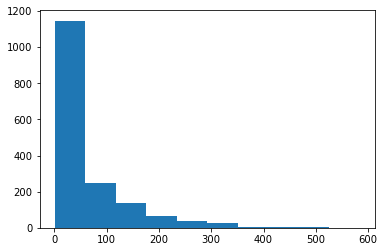

In [164]:
plt.hist(user_item_df.groupby(['ItemId'])['ItemId'].count()) 

#### create a new empty Ratings Matrix

In [166]:
ratings = np.zeros((n_users, n_items))

In [167]:
ratings

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

#### populate the ratings

In [169]:
for row in user_item_df.itertuples(): 
    ratings[row[1]-1, row[2]-1] = row[3] 

In [170]:
ratings

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

We observe Rating Matrix is extremely sparse. We have values for only a very low percentage of user-item ratings

In [171]:
sparsity = float(len(ratings.nonzero()[0])) 
sparsity /= (ratings.shape[0] * ratings.shape[1]) 
sparsity *= 100 
print('Sparsity: {:4.2f}%'.format(sparsity)) 

Sparsity: 6.30%


#### creating train and test splits

In [90]:
from sklearn.cross_validation import train_test_split

In [91]:
ratings_train, ratings_test = train_test_split(ratings,test_size=0.33, random_state=42)

In [92]:
print(ratings_train.shape)
#let's see the dimensions of the test set 
ratings_test.shape 

(631, 1682)


(312, 1682)

#### User Based Collaborative Filter

For this we need to find similar users to a user. We will use cosine_distance() method available in sklearn.metrics. We will apply this method on train data and create a user user matrix which has both dimensions equal to n_users

In [141]:
# dist_out = 1- sklearn.metrics.pairwise.cosine_distances(ratings_train)
# dist_out.shape
# dist_out
# ratings_train
# user_pred = dist_out.dot(ratings_train) / np.array([np.abs(dist_out).sum(axis=1)]).T 
# np.sum(dist_out[:,0])


In [142]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(ratings_train, metric='cosine')

In [156]:
mean_user_rating = ratings.mean(axis=1)

In [154]:
len(mean_user_rating)

943

In [ ]:
ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T   

In [143]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T   
    return pred

In [157]:
user_prediction = predict(ratings_test, user_similarity, type='user')

ValueError: shapes (631,631) and (312,1682) not aligned: 631 (dim 1) != 312 (dim 0)

In [146]:
user_prediction

array([[ 2.03885926,  0.70867261,  0.63572336, ...,  0.38740762,
         0.39011065,  0.39054107],
       [ 1.8739342 ,  0.54366703,  0.38094674, ...,  0.12114329,
         0.12520384,  0.12538069],
       [ 2.16880972,  0.80325823,  0.68264123, ...,  0.42379629,
         0.42729955,  0.42736874],
       ..., 
       [ 1.7606744 ,  0.34312895,  0.18744159, ..., -0.11660317,
        -0.11166062, -0.11230895],
       [ 1.9021799 ,  0.50954902,  0.39307189, ...,  0.11897417,
         0.12268523,  0.12276928],
       [ 1.6151535 ,  0.2733894 ,  0.13637207, ..., -0.15305273,
        -0.14868516, -0.14847154]])

In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [148]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))
                

In [151]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, ratings_test)))

User-based CF RMSE: 3.0830797024282037


#### Using PearsonR

In [173]:
ratings_df = pd.DataFrame(ratings)

In [174]:
ratings_df

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
user_item_df

,UserID,ItemId,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013
